In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
from scipy.stats import norm
from scipy.stats import t

# 5.1 Testing Two-Sided Hypotheses Concerning the Slope Coefficient

In [2]:
# load the `CASchools` dataset
CASchools=pd.read_csv('CASchools.csv')

# add student-teacher ratio
CASchools['STR'] = CASchools['students']/CASchools['teachers']

# add average test-score
CASchools['score'] = (CASchools['read'] + CASchools['math'])/2

# estimate the model
linear_model = smf.ols('score ~ STR', data = CASchools).fit()          

In [3]:
# print the summary of the coefficients to the console
linear_model.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,698.9329,9.467,73.825,0.000,680.323,717.543
STR,-2.2798,0.480,-4.751,0.000,-3.223,-1.337


In [4]:
# determine residual degrees of freedom
linear_model.df_resid

418.0

In [5]:
2*t.sf(abs(-4.751),418)

2.7875833245765383e-06

In [6]:
2*norm.cdf(-4.751)

2.0241313246091687e-06

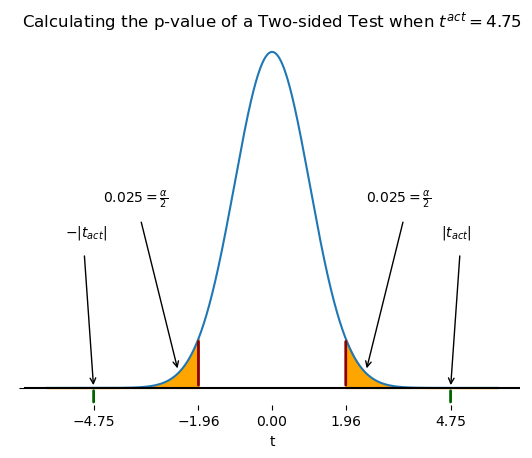

In [7]:
# Plot the standard normal on the support [-6,6]
x = np.arange(-6, 6, 0.0001)

plt.plot(x,norm.pdf(x))
plt.title(r'Calculating the p-value of a Two-sided Test when $t^{act}=4.75$')
plt.xticks([-4.75,-1.96,0,1.96,4.75])
plt.yticks([0],[" "])
plt.xlabel('t')

# Shade the critical regions using fill_between:

# critical region in left tail
plt.fill_between(x,norm.pdf(x),where=-1.96>x, color='orange')

# critical region in right tail
plt.fill_between(x,norm.pdf(x),where=1.96<x, color='orange')

# Add arrows and texts indicating critical regions and the p-value
plt.annotate('', xy=(-2.5,0.02), xytext=(-3.5,0.2), arrowprops=dict(arrowstyle='->'))
plt.annotate('', xy=(2.5,0.02), xytext=(3.5,0.2), arrowprops=dict(arrowstyle='->'))
plt.annotate('', xy=(-4.75, 0), xytext=(-5, 0.16), arrowprops=dict(arrowstyle='->'))
plt.annotate('', xy=(4.75, 0), xytext=(5, 0.16), arrowprops=dict(arrowstyle='->'))

# Add text of the arrows
plt.text(-4.5,0.22, s=r'$0.025=\frac{\alpha} {2}$')
plt.text(2.5,0.22, s=r'$0.025=\frac{\alpha} {2}$')
plt.text(-5.5, 0.18,s=r'$-|t_{act}|$')
plt.text(4.5, 0.18,s=r'$|t_{act}|$')


# Add ticks indicating critical values at the 0.05-level, t^act and -t^act 
tact=norm.pdf(1.96)
plt.annotate('', xy=(4.75,-0.02), xytext=(4.75,0), arrowprops=dict(arrowstyle='-',lw=2, color='darkgreen'))
plt.annotate('', xy=(-4.75,-0.02), xytext=(-4.75,0), arrowprops=dict(arrowstyle='-', lw=2,color='darkgreen'))
plt.annotate('', xy=(1.96,0.0), xytext=(1.96,tact), arrowprops=dict(arrowstyle='-',lw=2, color='darkred'))
plt.annotate('', xy=(-1.96,0.0), xytext=(-1.96,tact), arrowprops=dict(arrowstyle='-',lw=2, color='darkred'))


# Add the x-axis
plt.axhline(0, color='black')
plt.box(False);

# 5.2 Confidence Intervals for Regression Coefficients

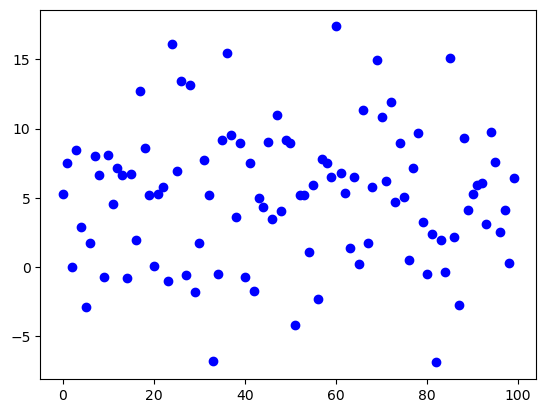

In [8]:
# set seed for reproducibility
np.random.seed(4)

# generate and plot the sample data
Y = np.random.normal(size = 100, loc = 5, scale = 5)

plt.plot(Y, 'bo');

In [9]:
CIlower = Y.mean() - 1.96 * 5 / 10
CIupper = Y.mean()  + 1.96 * 5 / 10
print( CIlower,  CIupper)


4.196367889869417 6.156367889869418


In [10]:
# set seed
np.random.seed(2)

# initialize vectors of lower and upper interval boundaries
lower = np.zeros(10000)
upper = np.zeros(10000)

# loop sampling / estimation / CI
for i in  range(10000):
    Y = np.random.normal(size=100, loc = 5, scale = 5)
    lower[i] = Y.mean()  - 1.96 * 5 / 10
    upper[i] = Y.mean()  + 1.96 * 5 / 10
  
# join vectors of interval bounds in a matrix
CIs = np.array([lower, upper]).T

In [11]:
CIs[(CIs[:,0]<=5 )&(CIs[:,1]>=5 )].shape[0]/10000

0.9468

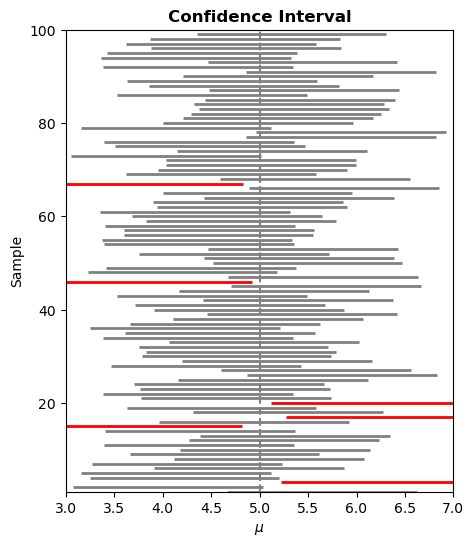

In [12]:
# identify intervals not covering mu
# (6 intervals out of 100)
ID=np.where((CIs[:100,0]>5 ) | (CIs[:100,1]<5 ))

# initialize the plot
plt.figure(figsize=(5,6))
plt.xlim(3,7)
plt.ylim(1,100)
plt.xlabel(r'$\mu$')
plt.ylabel('Sample')
plt.title("Confidence Interval",fontweight="bold")

# set up color vector
colors=np.repeat('gray',100)
colors[ID]='red'

# draw reference line at mu=5
plt.axvline(5,linestyle='--', color='gray')

# add horizontal bars representing the CIs
for j in range(100):
    plt.hlines(xmin=CIs[j:j+1,0][0],xmax=CIs[j:j+1,1][0],y=j, color=colors[j],linewidths=2);

In [13]:
# compute 95% confidence interval for coefficients in 'linear_model'
CASchools=pd.read_csv('CASchools.csv')
CASchools['STR']=CASchools['students']/CASchools['teachers']
CASchools['score'] = (CASchools['read'] + CASchools['math'])/2 
linear_model=smf.ols('score~STR', data=CASchools).fit()


linear_model.conf_int()

,0,1
Intercept,680.323124,717.542775
STR,-3.222980,-1.336636


In [14]:
# compute 95% confidence interval for coefficients in 'linear_model' by hand
print("lower",  linear_model.params[1]-t.ppf(0.975,df=linear_model.df_resid)*linear_model.bse[1])
print("upper",  linear_model.params[1]+t.ppf(0.975,df=linear_model.df_resid)*linear_model.bse[1])

lower -3.2229798510407095
upper -1.3366364292486805


 # 5.3 Regression when X is a Binary Variable

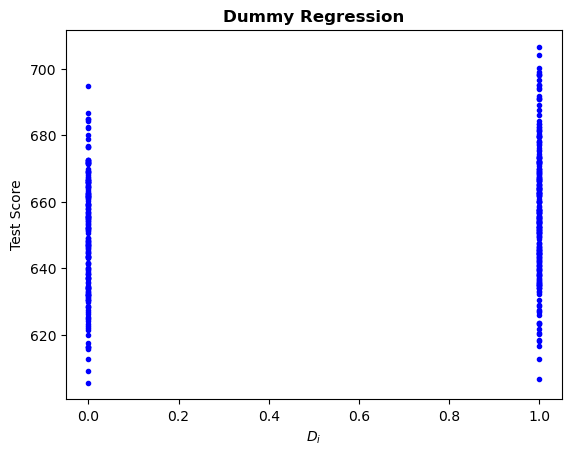

In [15]:
# Create the dummy variable as defined above
CASchools['D'] = CASchools['STR'] < 20

# Plot the data
plt.plot(CASchools['D'],CASchools['score'], # provide the data to be plotted
         'bo',markersize=3)                              # use filled blue circles as plot symbols
plt.title('Dummy Regression',fontweight="bold")               # Set title 
plt.xlabel(r'$D_{i}$')                      # Set x axis
plt.ylabel('Test Score');                      # Set y axis


In [16]:
# estimate the dummy regression model
dummy_model=smf.ols('score ~ D', data = CASchools).fit()    
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     15.07
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           0.000120
Time:                        14:31:37   Log-Likelihood:                -1825.9
No. Observations:                 420   AIC:                             3656.
Df Residuals:                     418   BIC:                             3664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    650.0768      1.393    466.666      0.000     647.339     652.815
D[T.True]      7.1694      1.847      3.882      0.000       3.540      10.799
==============================================================================
Omnibus:                        3.120   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.483
Skew:                           0.052   Prob(JB):                        0.289
Kurtosis:                       2.638   Cond. No.                         2.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

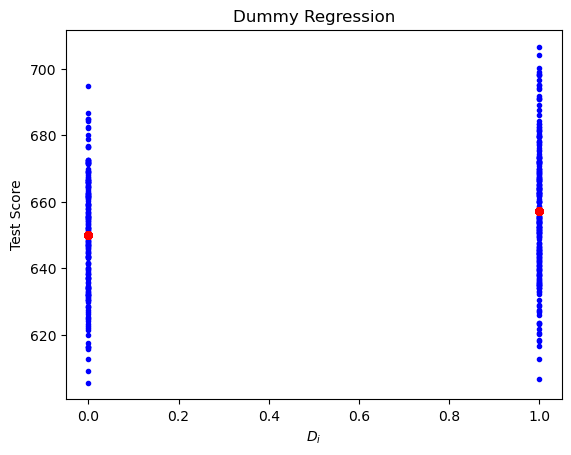

In [17]:
plt.plot(CASchools['D'],CASchools['score'], 'bo',markersize=3)                         
plt.title('Dummy Regression')             
plt.xlabel(r'$D_{i}$')                     
plt.ylabel('Test Score')

# add group specific predictions to the plot
plt.plot(CASchools['D'],dummy_model.predict(), 'ro',markersize=5);

In [18]:
# confidence intervals for coefficients in the dummy regression model
dummy_model.conf_int()

,0,1
Intercept,647.338594,652.815002
D[T.True],3.539562,10.799309


# 5.4 Heteroskedasticity and Homoskedasticity

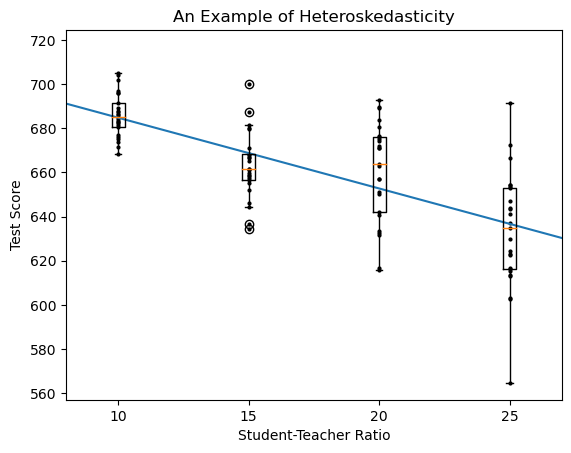

In [19]:
# generate some heteroskedastic data:
# set seed for reproducibility
np.random.seed(3)
# set up vector of x coordinates
x=np.repeat([10,15,20,25],25)

# sample 100 errors such that the variance increases with x
e=np.zeros(100)
e[0:25]=np.random.normal(size=25, scale=10)
e[25:50]=np.random.normal(size=25, scale=15)
e[50:75]=np.random.normal(size=25, scale=20)
e[75:100]=np.random.normal(size=25, scale=25)

# set up y
y=720-3.3*x+e

# Estimate the model 
mod=sm.OLS(y,sm.add_constant(x)).fit()

# Plot the data
plt.plot(x,y,'ko',markersize=2)
plt.xlim(8,27)
plt.title('An Example of Heteroskedasticity')
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Test Score')

# Add the regression line to the plot
plt.axline((0,mod.params[0]), slope=mod.params[1])

# Add boxplots to the plot
plt.boxplot([y[0:25],y[25:50],y[50:75],y[75:100]], positions=[10,15,20,25]);



## A Real-World Example for Heteroskedasticity

In [20]:
CPSSWEducation=pd.read_csv('CPSSWEducation.csv')
CPSSWEducation.describe()

,age,earnings,education
count,2950.000000,2950.000000,2950.000000
mean,29.497627,16.742717,13.550169
std,0.500079,9.402076,2.314100
min,29.000000,2.136752,6.000000
25%,29.000000,10.576923,12.000000
50%,29.000000,14.615385,13.000000
75%,30.000000,20.192308,16.000000
max,30.000000,97.500000,18.000000


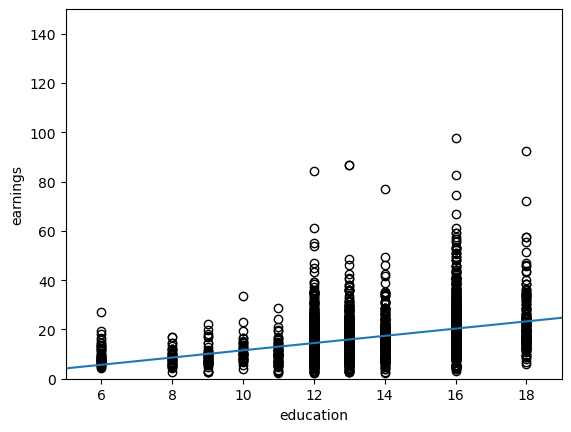

In [21]:
# estimate a simple regression model
labor_model=sm.OLS(CPSSWEducation['earnings'],sm.add_constant(CPSSWEducation['education'])).fit()

# plot observations and add the regression line
plt.plot(CPSSWEducation['education'], CPSSWEducation['earnings'], 'ko', fillstyle='none')
plt.axline((0,labor_model.params[0]), slope=labor_model.params[1])
plt.xlim(5,19)
plt.ylim(0,150)
plt.ylabel('earnings')
plt.xlabel('education');


In [22]:
# print the contents of labor_model to the console
labor_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-3.1344,0.959,-3.268,0.001,-5.015,-1.253
education,1.4669,0.070,21.021,0.000,1.330,1.604


In [23]:
# compute a 95% confidence interval for the coefficients in the model
labor_model.conf_int()

,0,1
const,-5.015248,-1.253495
education,1.330098,1.603753


## Should We Care About Heteroskedasticity?

In [24]:
# Extract the standard error of the regression from model summary
SER=np.sqrt(labor_model.scale)

# Compute the variation in 'education'
V=(len(CPSSWEducation)-1)*CPSSWEducation['education'].var()

# Compute the standard error of the slope parameter's estimator and print it
SE_beta_1_hat=np.sqrt(SER**2/V)
SE_beta_1_hat

0.06978280559776007

In [25]:
# Use logical operators to see if the value computed by hand matches the one provided by the package. 
#Round estimates to two decimal places
round(labor_model.HC0_se[1],2)==round(SE_beta_1_hat,2)

True

## Computation of Heteroskedasticity-Robust Standard Errors

In [26]:
# compute heteroskedasticity-robust standard errors
linear_model2 = smf.ols('score ~ STR', data = CASchools).fit(cov_type='HC1') 
linear_model2.cov_params()

,Intercept,STR
Intercept,107.419993,-5.363911
STR,-5.363911,0.269869


In [27]:
# compute the square root of the diagonal elements in vcov
robust_se=np.sqrt(linear_model2.cov_params_default.diagonal())
robust_se

array([10.36436168,  0.51948934])

In [28]:
# t test of coefficients
linear_model2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,698.9329,10.364,67.436,0.000,678.619,719.247
STR,-2.2798,0.519,-4.389,0.000,-3.298,-1.262


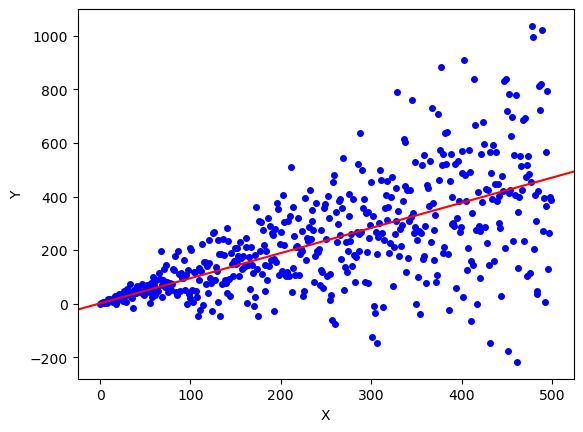

In [29]:
# generate heteroskedastic data 
np.random.seed(23)
X=np.arange(500)
Y=np.random.normal(size=500, loc=X, scale=0.6*X)

# estimate a simple regression model
reg=sm.OLS(Y,X).fit()

# plot the data
plt.plot(X,Y, 'bo', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')

# add the regression line to the plot
plt.axline((0,reg.params[0]), slope=reg.params[0], color='red');

In [30]:
# test hypothesis using the default standard error formula
print(reg.t_test('x1=1').summary_frame()['P>|t|']<0.05)

# test hypothesis using the robust standard error formula
reg2=sm.OLS(Y,X).fit(cov_type='HC1')
print(reg2.t_test('x1=1').summary_frame()['P>|z|']<0.05)




c0    True
Name: P>|t|, dtype: bool
c0    False
Name: P>|z|, dtype: bool


In [31]:
# initialize vectors t and t.rob
t1 = []
t_rob = []

# loop sampling and estimation
for i in range(1000):
    # sample data
    X = list(range(1000))
    Y = [np.random.normal(loc=x, scale=0.6 * x) for x in X]
    
    #Y = [random.normalvariate(x, 0.6 * x) for x in X]

    # estimate regression model
    reg = smf.ols('Y ~ X', data=pd.DataFrame({'X':X,'Y':Y})).fit()

    # homoskedasdicity-only significance test
    t1.append(reg.f_test("X=1").pvalue.item() < 0.05)

    # robust significance test
    t_rob.append(reg.get_robustcov_results(cov_type='HC1').f_test("X=1").pvalue.item() < 0.05)

# compute the fraction of false rejections
print(round(pd.DataFrame({'t':np.mean(t1), 't.rob':np.mean(t_rob)}, index=[0]),3))


    

       t  t.rob
0  0.079  0.054


# 5.5 The Gauss-Markov Theorem

## Simulation Study: BLUE Estimator

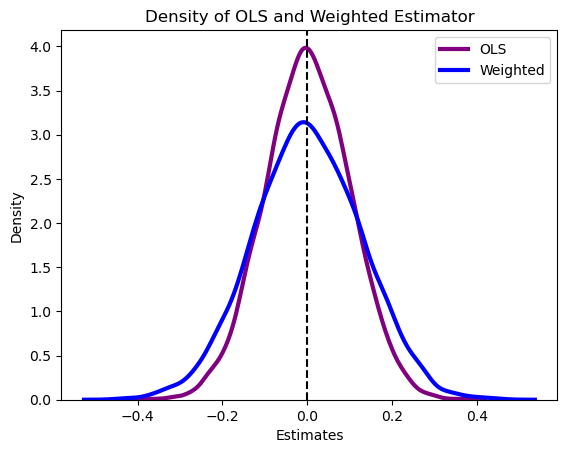

In [32]:
# set sample size and number of repetitions
n=100
reps=10000

# choose epsilon and create a vector of weights as defined above
epsilon=0.8
w=np.append(np.repeat((1+epsilon)/n,n/2),np.repeat((1-epsilon)/n,n/2))

# draw a random sample y_1,...,y_n from the standard normal distribution, 
# use both estimators 1e5 times and store the result in the vectors 'ols' and 
# 'weightedestimator'

ols=[]
weightedestimator=[]

for i in range(reps):
    y=np.random.normal(size=n)
    ols.append(y.mean())
    weightedestimator.append(np.dot(w,y))
    
#plot kernel density estimates of the estimators' distributions: 

# OLS
sns.kdeplot(ols,color='purple', linewidth=3, label='OLS')

# weighted
sns.kdeplot(weightedestimator,color='blue', linewidth=3, label='Weighted')

plt.title('Density of OLS and Weighted Estimator')
plt.xlabel('Estimates')
plt.ylabel('Density')

# add a dashed line at 0 and add a legend to the plot
plt.axvline(x=0, linestyle='--', color='black')


plt.legend();

# 5.6 Using the t-Statistic in Regression When the Sample Size Is Small

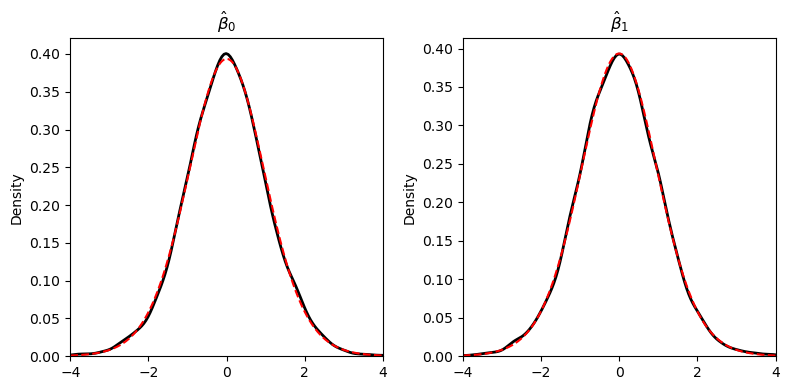

In [33]:
# initialize two vectors
beta_0 =[]
beta_1 =[]

# loop sampling / estimation / t statistics
for i in range(10000):
    X=np.random.uniform(low=0, high=20, size=20)
    Y=np.random.normal(size=20, loc=X)
    reg=sm.OLS(Y,sm.add_constant(X)).fit()
    beta_0.append(reg.params[0]/reg.bse[0])
    beta_1.append((reg.params[1]-1)/reg.bse[1])
    
# plot the distributions and compare with t_18 density:

# divide plotting area
fig,axes=plt.subplots(1,2, figsize=(8,4))

# plot the simulated density of beta_0
sns.kdeplot(ax=axes[0],data=beta_0,color='black', linewidth=2)
axes[0].set_title(r'$ \hat{ \beta}_{0}$')
axes[0].set_xlim(-4,4)

# plot the simulated density of beta_1
sns.kdeplot(ax=axes[1],data=beta_1,color='black', linewidth=2)
axes[1].set_title(r'$ \hat{ \beta}_{1}$')
axes[1].set_xlim(-4,4)

# add the t_18 density to the plot
x = np.arange(-4, 4, 0.001)
axes[0].plot(x, t.pdf(x, df=18), '--', color='red')
axes[1].plot(x, t.pdf(x, df=18), '--', color='red')
plt.tight_layout();